In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from pystem.stemsegmentation import segmentationSTEM
plt.rcParams['figure.dpi'] = 200

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
image = np.load('FeNb_phase_boundary.npy')

([], <a list of 0 Text major ticklabel objects>)

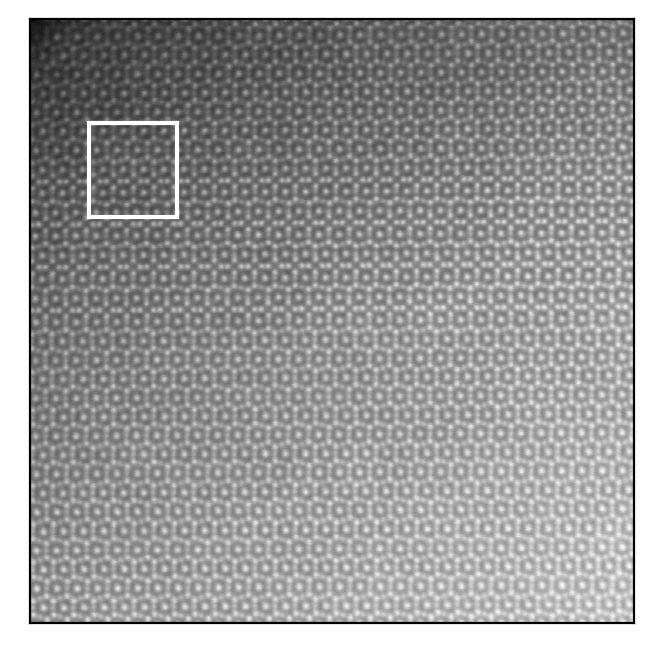

In [5]:
plt.imshow(image, cmap='gray')
plt.plot([100,100],[175,335],color='white')
plt.plot([100,250],[175,175],color='white')
plt.plot([100,250],[335,335],color='white')
plt.plot([250,250],[175,335],color='white')
plt.xticks([])
plt.yticks([])

In [6]:
descriptor_name = 'local_correlation_map'
seg = segmentationSTEM( n_patterns=2,
                       window_x=30,window_y=30,
                       patch_x=30,patch_y=30,
                       step=10,
                       descriptor_name=descriptor_name,
                       max_num_points = 300,
                       upsampling=True)
start = time.time()
labels = seg.perform_clustering(image)
print ('time_cost: %6.2f[s]' %(time.time()-start,))

time_cost:   4.95[s]


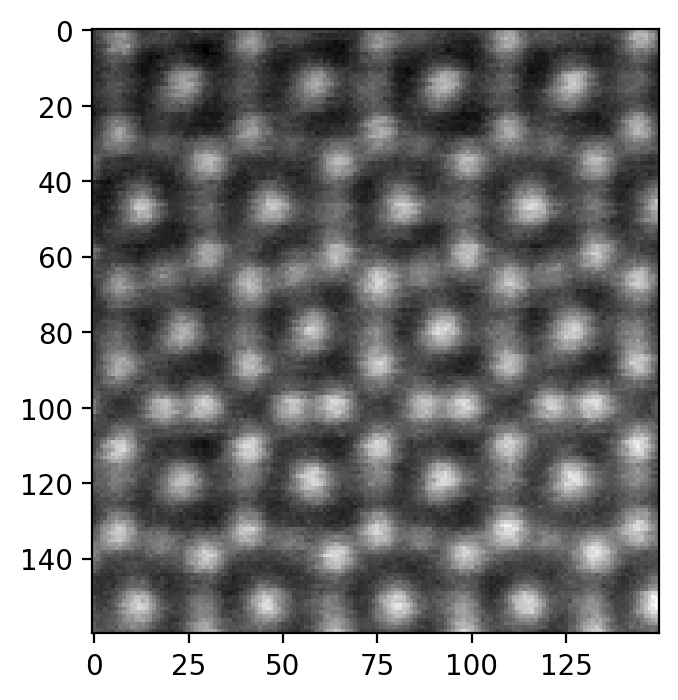

In [8]:
tt = image+ 0*np.mean(image)*labels

plt.imshow(tt[175:335,100:250],cmap='gray')
#plt.xticks([])
#plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

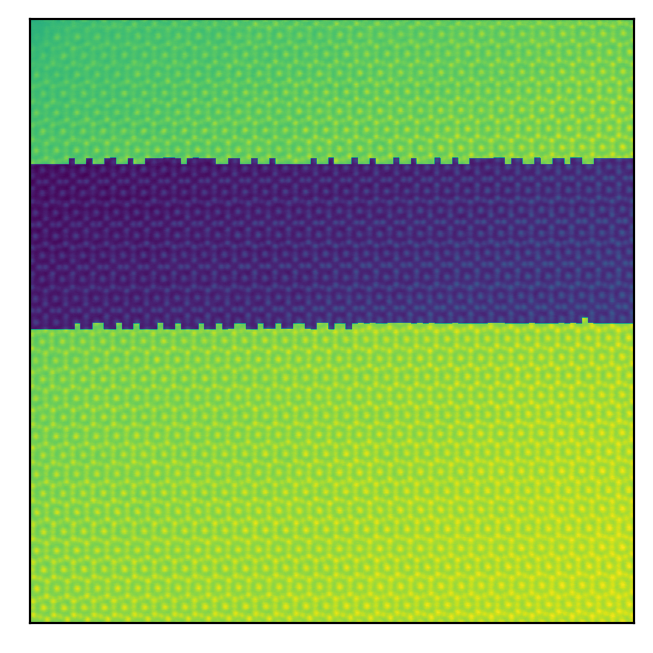

In [9]:

plt.imshow(image + 3*np.mean(image)*labels)
plt.xticks([])
plt.yticks([])

In [10]:
descriptors = seg._descriptors
shape = descriptors.shape
descriptors = np.reshape(descriptors, (-1,shape[2]))
variance = np.var(descriptors, axis=0)
pca_features = seg._PCA_components
shape = pca_features.shape
pca_features = np.reshape(pca_features,(-1, shape[2]))
variance_pca = np.var(pca_features, axis=0)

descriptors = seg._descriptors
labels_kmeans= seg._kmeans.labels_
shape = seg._descriptors.shape
labels_kmeans = np.reshape(labels_kmeans,(shape[0],shape[1]))

In [11]:
indices = np.where(labels_kmeans==0)
descriptors_0 = descriptors[indices[0],indices[1],:]
shape = descriptors_0.shape
mean_0 = np.mean(descriptors_0,axis=0)

variance_0 = np.var(descriptors_0,axis=0)

indices = np.where(labels_kmeans==1)
descriptors_1 = descriptors[indices[0],indices[1],:]
shape = descriptors_1.shape
mean_1 = np.mean(descriptors_1,axis=0)
variance_1 = np.var(descriptors_1, axis=0)

shape = descriptors.shape
mean_tot = np.mean(np.reshape(descriptors,(-1,shape[2])),axis=0)
up = len(descriptors_0)*(mean_0-mean_tot)**2 + len(descriptors_1)*(mean_1-mean_tot)**2
down = len(descriptors_0)*variance_0 + len(descriptors_1)*variance_1
separability = up/down

In [12]:
shape = descriptors.shape

In [13]:
pca_features = np.reshape(pca_features, (shape[0],shape[1],-1))

In [14]:
indices = np.where(labels_kmeans==0)
descriptors_0 = pca_features[indices[0],indices[1],:]
shape = descriptors_0.shape
mean_0 = np.mean(descriptors_0,axis=0)

variance_0 = np.var(descriptors_0,axis=0)

indices = np.where(labels_kmeans==1)
descriptors_1 = pca_features[indices[0],indices[1],:]
shape = descriptors_1.shape
mean_1 = np.mean(descriptors_1,axis=0)
variance_1 = np.var(descriptors_1, axis=0)

shape = pca_features.shape
mean_tot = np.mean(np.reshape(pca_features,(-1,shape[2])),axis=0)
up = len(descriptors_0)*(mean_0-mean_tot)**2 + len(descriptors_1)*(mean_1-mean_tot)**2
down = len(descriptors_0)*variance_0 + len(descriptors_1)*variance_1
separability_pca = up/down

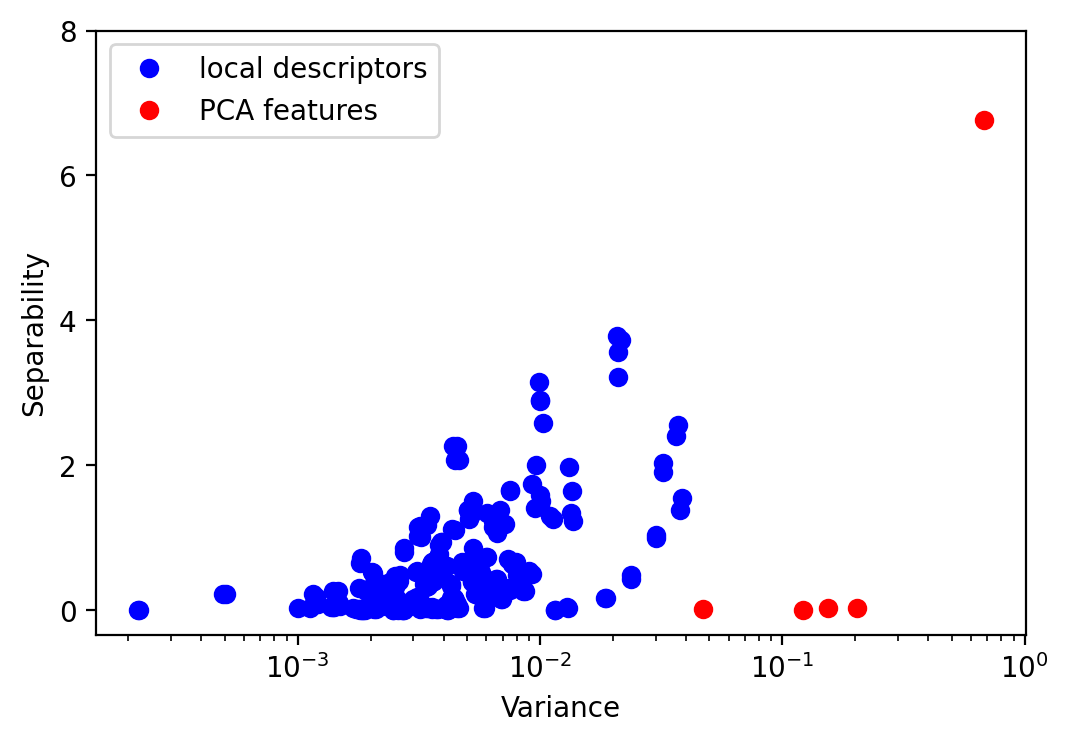

In [15]:
fig, ax1 = plt.subplots()
ax1.plot(variance, separability,'bo',label='local descriptors')
ax1.plot(variance_pca,separability_pca, 'ro',label='PCA features')
ax1.set_xscale('log')
ax1.set_yticks([0,2,4,6,8])
ax1.set_xlabel('Variance')
ax1.set_ylabel('Separability')
ax1.legend(loc='upper left')

In [16]:
fig.savefig('separability_and_variance.eps',bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
